# Reducing the ab color space

As part of the inroductory theory, it was already mentioned that trying to colorize a black and white image using sheer mean error loss approximation, might lead to B&W images turning sepia. Have a look at one of [Ryan Dahl's](http://tinyclouds.org/colorize/) unsuccessful attempts:

![Automatic Colorization](http://tinyclouds.org/colorize/reddit1/full.jpg)
The photo in the middle is the result of the automatic colorization. The photo on the right was colorized by a human expert. 

Photos have a high dimensionality when it comes to colors. Thus, turning the problem of colorizazion from regression to classification might be a problem. Let's do some basic math, assuming we have a 512x512 image:

In [4]:
512 * 512 * 256 * 256 * 256

4398046511104

That's a lot of classes! Even turning the RGB into Lab, taking the **L** layer away as our input, and only focusing on **a** and **b** layers, won't help much:

In [5]:
512 * 512 * 256 * 256

17179869184

We have to reduce the feature space by as much as one more dimension. Turns out that by quantizing the **ab** feature space to a 10x10 grid, we can reduce overall feature space by at least 100 times, without affacting the overall image quality much. Let's see how this works:

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [46]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import sklearn.neighbors as nn
from PIL import Image, ImageOps
from matplotlib.pyplot import imshow, imsave
from skimage.color import lab2rgb, rgb2lab

In [8]:
def load_and_resize_image(image_path, target_size=None) -> Image:
    '''
    # Returns
    # The loaded and resized PIL image
    '''
    img = Image.open(image_path)

    if target_size is None:
        return img
    else:
        return ImageOps.fit(img, target_size, Image.ANTIALIAS)

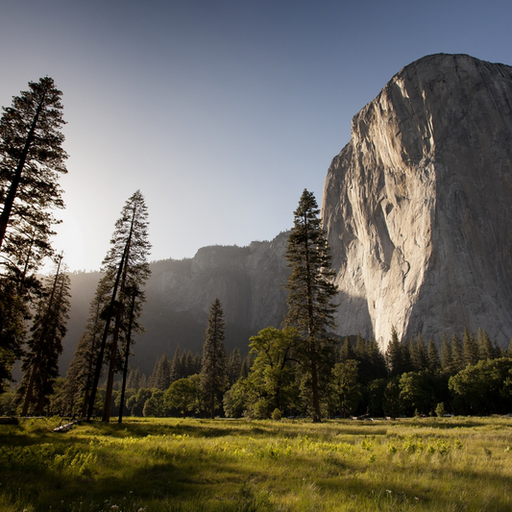

In [55]:
# photo source: https://unsplash.com/photos/ndN00KmbJ1c
image = load_and_resize_image('images/adam_kool_el_capitan.jpeg', target_size=(512, 512))

def quantize_image_to_grid_lab(image, grid_size):
    lab_image = rgb2lab(image)
    l_channel = lab_image[:, :, 0]
    ab_channels = lab_image[:, :, 1:]
    ab_channels = np.round(ab_channels)
    ab_channels = ab_channels - (ab_channels % grid_size)
    ab_channels
    lab_image[:, :, 1:] = ab_channels
    
    return lab_image

def quantize_image_to_grid(image, grid_size):
    return lab2rgb(quantize_image_to_grid_lab(image, grid_size))

image

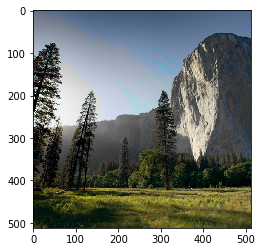

In [56]:
imshow(quantize_image_to_grid(image=image, grid_size=10))

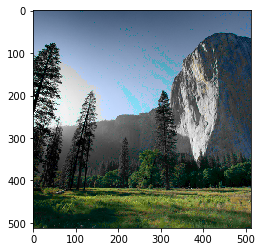

In [57]:
imshow(quantize_image_to_grid(image=image, grid_size=20))

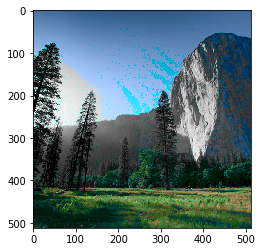

In [58]:
imshow(quantize_image_to_grid(image=image, grid_size=30))

As you can see quantizing to a grid of 30, leads to a significant visual color loss, but 10 is pretty much fine. 

Let's see how this works, and if we could possibly reduce the color space even further.

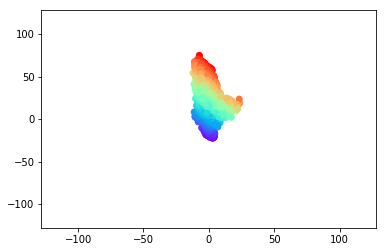

In [72]:
plt.xlim(-128, 128)
plt.ylim(-128, 128)

lab_image = rgb2lab(image)
color_indices = (lab_image[:, :, 1] + 128) / 128 * (rgb2lab(image)[:, :, 2] + 128) / 128

plt.scatter(lab_image[:, :, 1], lab_image[:, :, 2], c=color_indices, cmap=cm.rainbow)

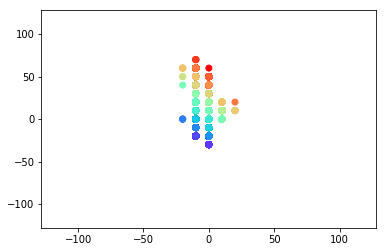

In [67]:
plt.xlim(-128, 128)
plt.ylim(-128, 128)

lab_image = quantize_image_to_grid_lab(image, 10)
color_indices = (lab_image[:, :, 1] + 128) / 128 * (rgb2lab(image)[:, :, 2] + 128) / 128

plt.scatter(lab_image[:, :, 1], lab_image[:, :, 2], c=color_indices, cmap=cm.rainbow)